In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [209]:
conn = sqlite3.connect("../db.sqlite")
df = pd.read_sql_query("SELECT * FROM data", conn)
df.head()

,isPrime,timeisPrime,trialDivision,timetrialDivision,trialDivision2,timetrialDivision2,trialDivision3,timetrialDivision3,isPrimeBigInteger,timeisPrimeBigInteger,millerRabin,timemillerRabin,millerRabin2,timemillerRabin2
0,isPrime,28100,trialDivision,13300,trialDivision2,6000,trialDivision3,5000,isPrimeBigInteger,3800,millerRabin,6100,millerRabin2,9400
1,isPrime,16900,trialDivision,3000,trialDivision2,1700,trialDivision3,1800,isPrimeBigInteger,400,millerRabin,1800,millerRabin2,2100
2,isPrime,14000,trialDivision,1800,trialDivision2,1600,trialDivision3,1700,isPrimeBigInteger,300,millerRabin,1500,millerRabin2,1900
3,isPrime,17400,trialDivision,1700,trialDivision2,1600,trialDivision3,1700,isPrimeBigInteger,300,millerRabin,1400,millerRabin2,1800
4,isPrime,15900,trialDivision,1700,trialDivision2,1600,trialDivision3,1700,isPrimeBigInteger,300,millerRabin,1500,millerRabin2,1800


In [210]:
df.describe()


,timeisPrime,timetrialDivision,timetrialDivision2,timetrialDivision3,timeisPrimeBigInteger,timemillerRabin,timemillerRabin2
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2710.560000,2.177990e+03,1399.920000,1453.560000,124.060000,1542.650000,1405.660000
std,6642.803864,5.171086e+04,574.065283,569.121882,357.675705,614.291228,487.222437
min,1400.000000,1.300000e+03,1300.000000,1300.000000,0.000000,1300.000000,1300.000000
25%,1600.000000,1.400000e+03,1300.000000,1300.000000,100.000000,1300.000000,1300.000000
50%,2000.000000,1.500000e+03,1400.000000,1400.000000,100.000000,1400.000000,1400.000000
75%,2500.000000,1.500000e+03,1400.000000,1400.000000,100.000000,1500.000000,1400.000000
max,405900.000000,5.133700e+06,43600.000000,39500.000000,17200.000000,37900.000000,30400.000000


In [211]:
# Window of 10% of the data
win = int(len(df) * 0.1)

# For each numerical column, create a new column with the rolling mean and the mean
for col in df.columns:
    if df[col].dtype != "object":
        df[col + "_mean"] = df[col].rolling(window=win).mean()
        df[col + "_mean"].fillna(df[col].mean(), inplace=True)

df.head()


,isPrime,timeisPrime,trialDivision,timetrialDivision,trialDivision2,timetrialDivision2,trialDivision3,timetrialDivision3,isPrimeBigInteger,timeisPrimeBigInteger,...,timemillerRabin,millerRabin2,timemillerRabin2,timeisPrime_mean,timetrialDivision_mean,timetrialDivision2_mean,timetrialDivision3_mean,timeisPrimeBigInteger_mean,timemillerRabin_mean,timemillerRabin2_mean
0,isPrime,28100,trialDivision,13300,trialDivision2,6000,trialDivision3,5000,isPrimeBigInteger,3800,...,6100,millerRabin2,9400,2710.56,2177.99,1399.92,1453.56,124.06,1542.65,1405.66
1,isPrime,16900,trialDivision,3000,trialDivision2,1700,trialDivision3,1800,isPrimeBigInteger,400,...,1800,millerRabin2,2100,2710.56,2177.99,1399.92,1453.56,124.06,1542.65,1405.66
2,isPrime,14000,trialDivision,1800,trialDivision2,1600,trialDivision3,1700,isPrimeBigInteger,300,...,1500,millerRabin2,1900,2710.56,2177.99,1399.92,1453.56,124.06,1542.65,1405.66
3,isPrime,17400,trialDivision,1700,trialDivision2,1600,trialDivision3,1700,isPrimeBigInteger,300,...,1400,millerRabin2,1800,2710.56,2177.99,1399.92,1453.56,124.06,1542.65,1405.66
4,isPrime,15900,trialDivision,1700,trialDivision2,1600,trialDivision3,1700,isPrimeBigInteger,300,...,1500,millerRabin2,1800,2710.56,2177.99,1399.92,1453.56,124.06,1542.65,1405.66


In [212]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   isPrime                     10000 non-null  object 
 1   timeisPrime                 10000 non-null  int64  
 2   trialDivision               10000 non-null  object 
 3   timetrialDivision           10000 non-null  int64  
 4   trialDivision2              10000 non-null  object 
 5   timetrialDivision2          10000 non-null  int64  
 6   trialDivision3              10000 non-null  object 
 7   timetrialDivision3          10000 non-null  int64  
 8   isPrimeBigInteger           10000 non-null  object 
 9   timeisPrimeBigInteger       10000 non-null  int64  
 10  millerRabin                 10000 non-null  object 
 11  timemillerRabin             10000 non-null  int64  
 12  millerRabin2                10000 non-null  object 
 13  timemillerRabin2            1000

In [213]:
# Drop the columns that are objects
df.drop(df.select_dtypes(["object"]), inplace=True, axis=1)
df.head()

,timeisPrime,timetrialDivision,timetrialDivision2,timetrialDivision3,timeisPrimeBigInteger,timemillerRabin,timemillerRabin2,timeisPrime_mean,timetrialDivision_mean,timetrialDivision2_mean,timetrialDivision3_mean,timeisPrimeBigInteger_mean,timemillerRabin_mean,timemillerRabin2_mean
0,28100,13300,6000,5000,3800,6100,9400,2710.56,2177.99,1399.92,1453.56,124.06,1542.65,1405.66
1,16900,3000,1700,1800,400,1800,2100,2710.56,2177.99,1399.92,1453.56,124.06,1542.65,1405.66
2,14000,1800,1600,1700,300,1500,1900,2710.56,2177.99,1399.92,1453.56,124.06,1542.65,1405.66
3,17400,1700,1600,1700,300,1400,1800,2710.56,2177.99,1399.92,1453.56,124.06,1542.65,1405.66
4,15900,1700,1600,1700,300,1500,1800,2710.56,2177.99,1399.92,1453.56,124.06,1542.65,1405.66


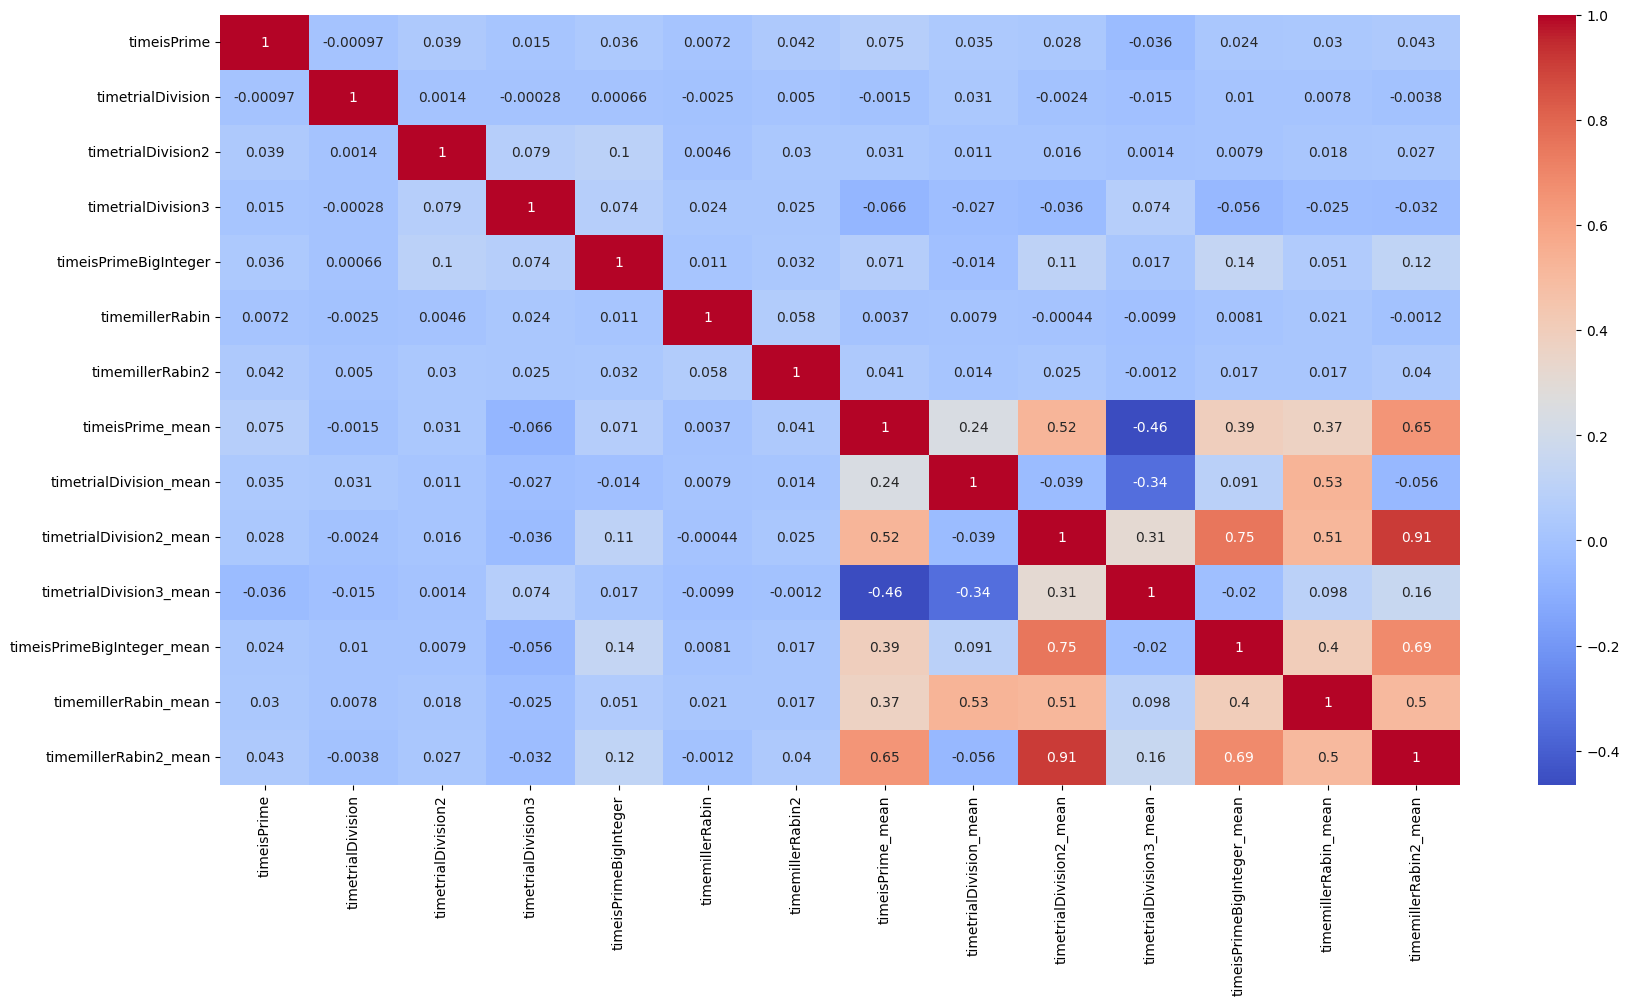

In [214]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

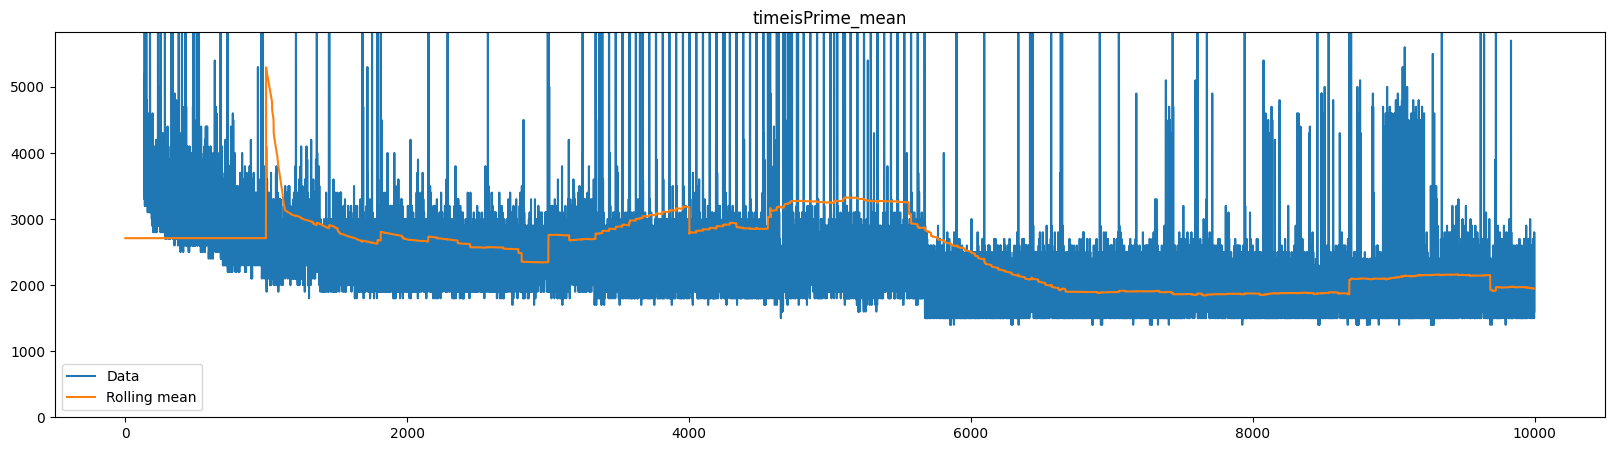

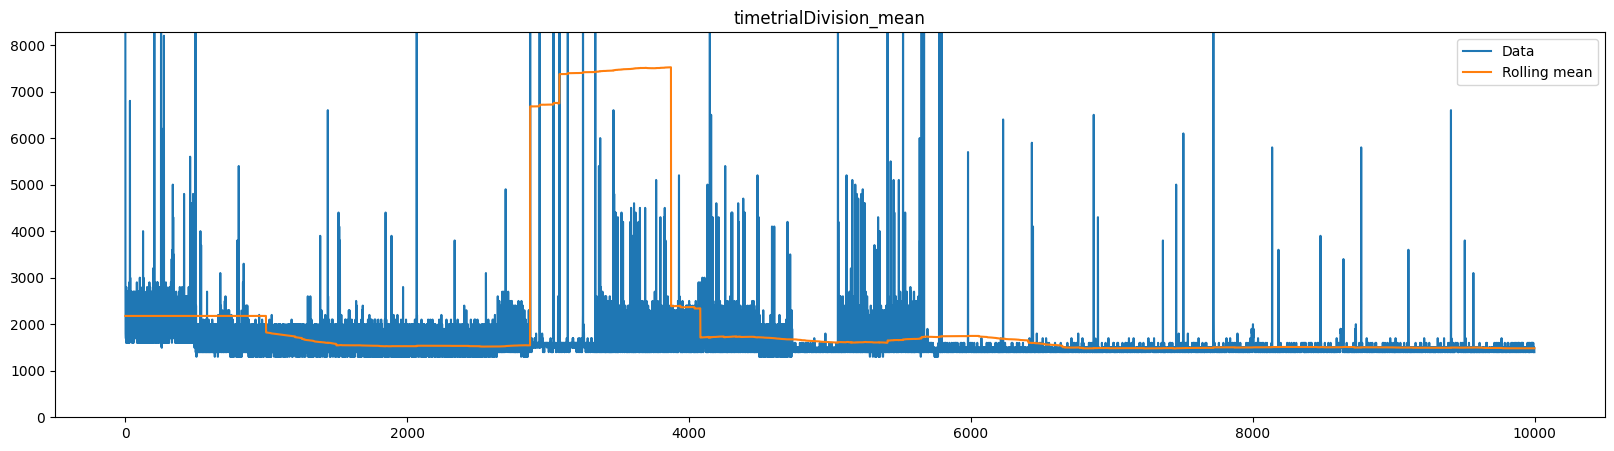

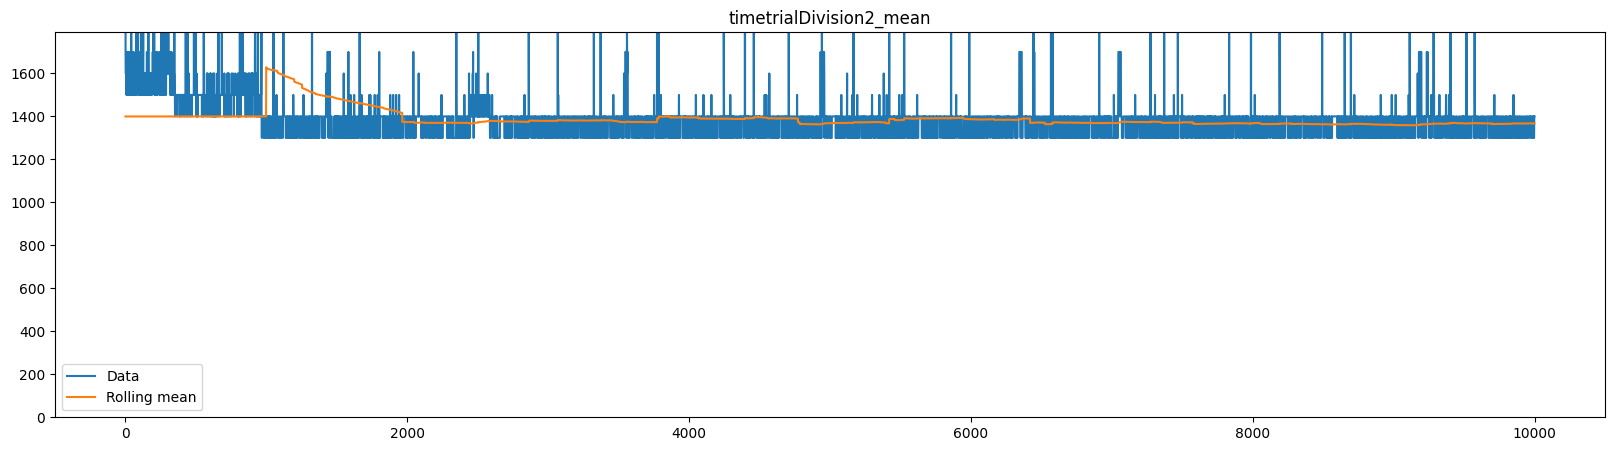

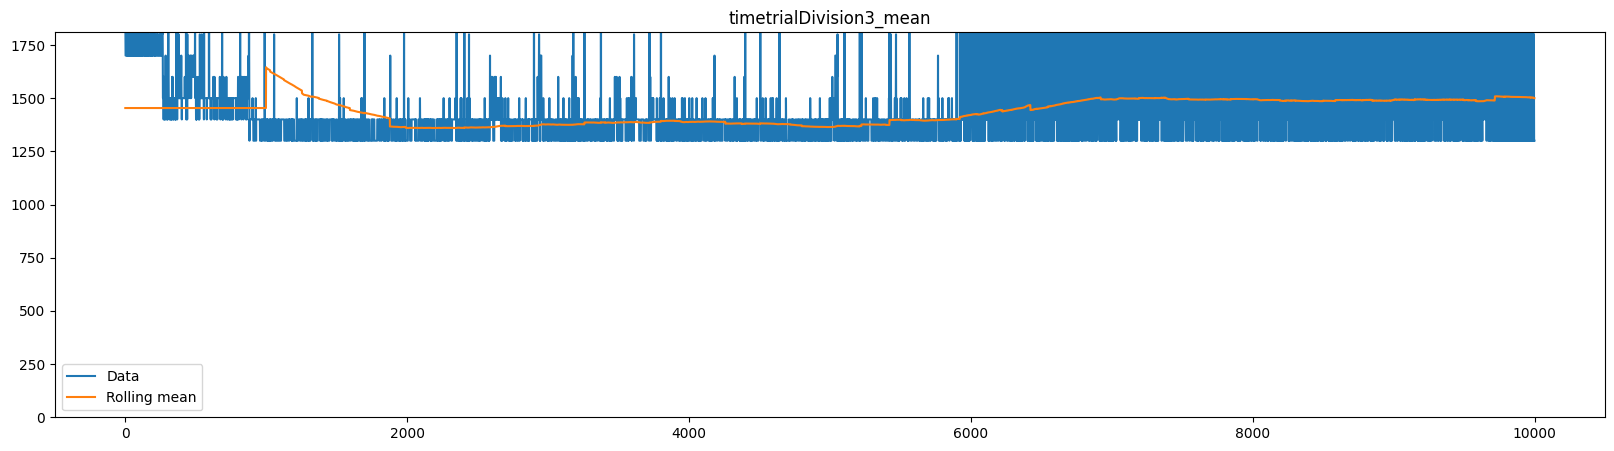

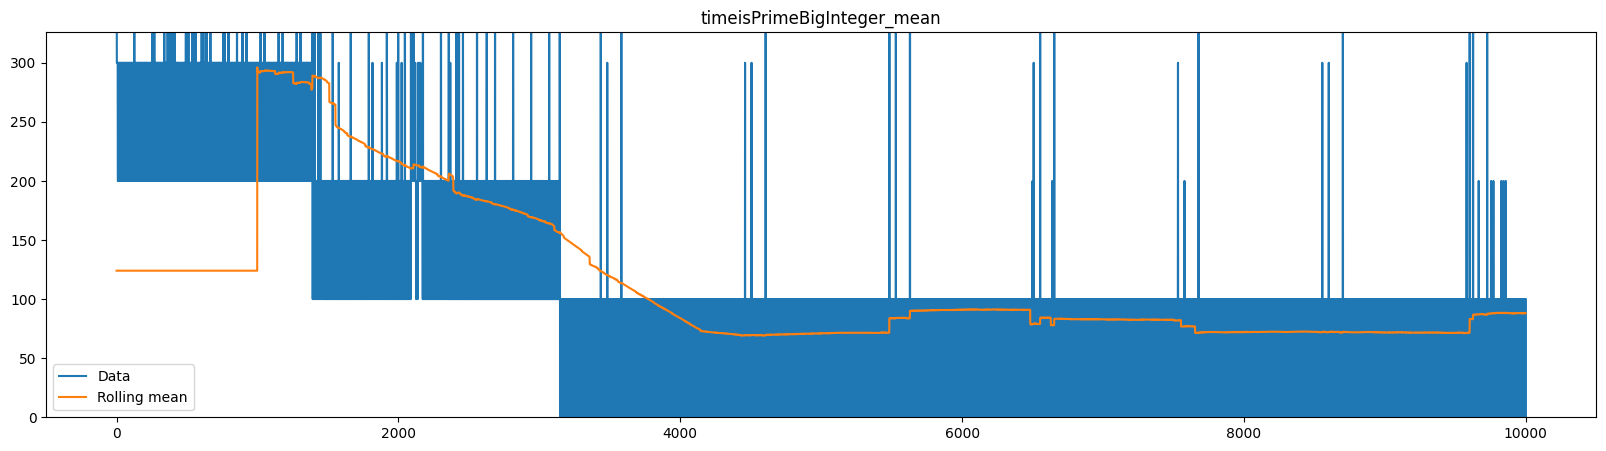

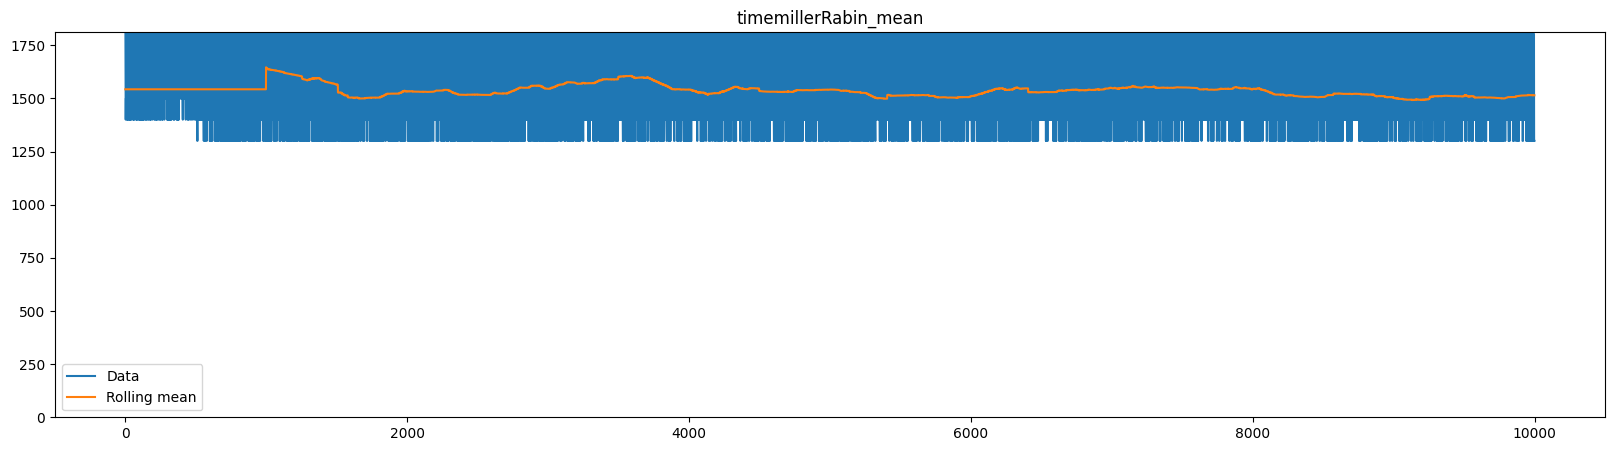

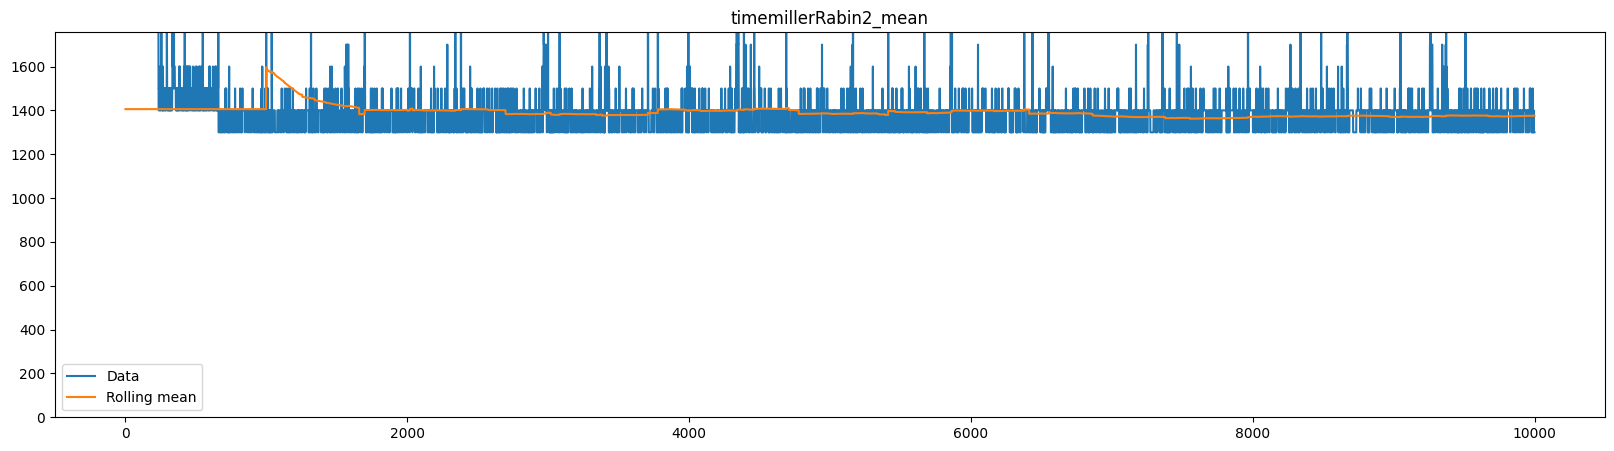

In [215]:
# Plot the rolling mean of the columns
for col in df.columns:
    if "_mean" in col:
        plt.figure(figsize=(20, 5))
        plt.title(col)
        # Limit the y axis to the max value of the column
        # to make the plot more readable
        plt.ylim(0, df[col].max() * 1.1)  # 10% more than the max valu
        plt.plot(
            df[col.replace("_mean", "")],
        )
        plt.plot(df[col])
        plt.legend(["Data", "Rolling mean"])
        plt.show()

In [216]:
# Sigma value for the rolling mean
sigma = 2

# Create the upper and lower bound for each column
for col in df.columns:
    if "_mean" in col:
        df[col + "_upper"] = (
            df[col] + df[col.replace("_mean", "")].rolling(window=win).std() * sigma
        )
        df[col + "_lower"] = (
            df[col] - df[col.replace("_mean", "")].rolling(window=win).std() * sigma
        )
        # Fill the NaN values with the mean
        df[col + "_upper"].fillna(df[col].mean(), inplace=True)
        df[col + "_lower"].fillna(df[col].mean(), inplace=True)

df.head()

,timeisPrime,timetrialDivision,timetrialDivision2,timetrialDivision3,timeisPrimeBigInteger,timemillerRabin,timemillerRabin2,timeisPrime_mean,timetrialDivision_mean,timetrialDivision2_mean,...,timetrialDivision2_mean_upper,timetrialDivision2_mean_lower,timetrialDivision3_mean_upper,timetrialDivision3_mean_lower,timeisPrimeBigInteger_mean_upper,timeisPrimeBigInteger_mean_lower,timemillerRabin_mean_upper,timemillerRabin_mean_lower,timemillerRabin2_mean_upper,timemillerRabin2_mean_lower
0,28100,13300,6000,5000,3800,6100,9400,2710.56,2177.99,1399.92,...,1389.764948,1389.764948,1439.267154,1439.267154,116.697174,116.697174,1536.777565,1536.777565,1392.690524,1392.690524
1,16900,3000,1700,1800,400,1800,2100,2710.56,2177.99,1399.92,...,1389.764948,1389.764948,1439.267154,1439.267154,116.697174,116.697174,1536.777565,1536.777565,1392.690524,1392.690524
2,14000,1800,1600,1700,300,1500,1900,2710.56,2177.99,1399.92,...,1389.764948,1389.764948,1439.267154,1439.267154,116.697174,116.697174,1536.777565,1536.777565,1392.690524,1392.690524
3,17400,1700,1600,1700,300,1400,1800,2710.56,2177.99,1399.92,...,1389.764948,1389.764948,1439.267154,1439.267154,116.697174,116.697174,1536.777565,1536.777565,1392.690524,1392.690524
4,15900,1700,1600,1700,300,1500,1800,2710.56,2177.99,1399.92,...,1389.764948,1389.764948,1439.267154,1439.267154,116.697174,116.697174,1536.777565,1536.777565,1392.690524,1392.690524


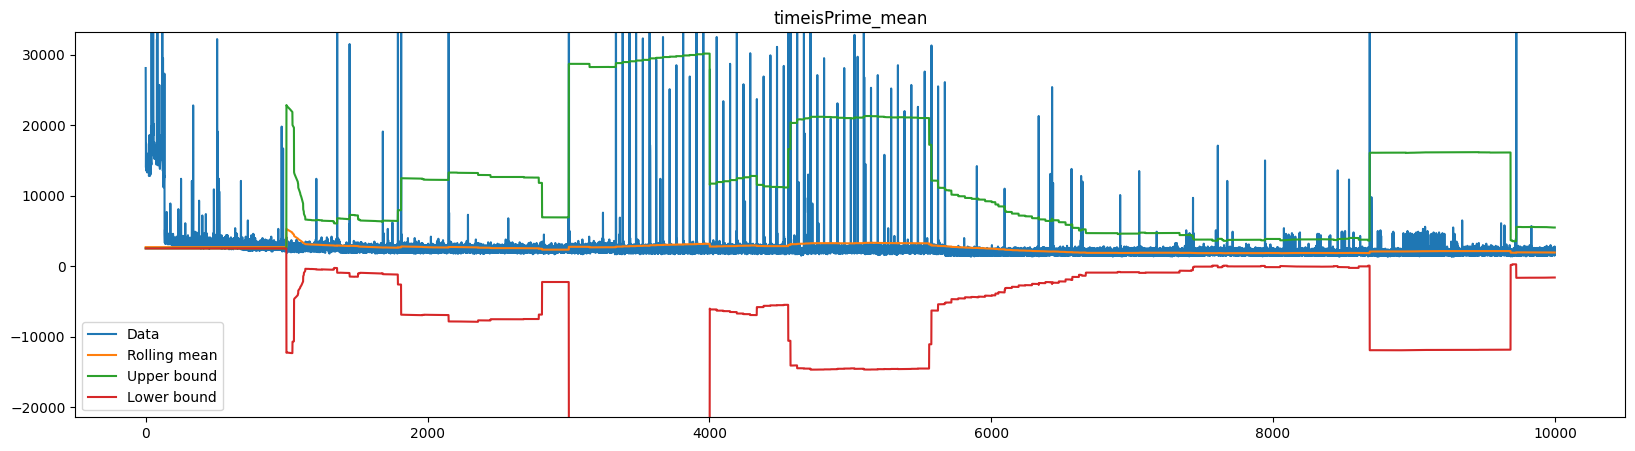

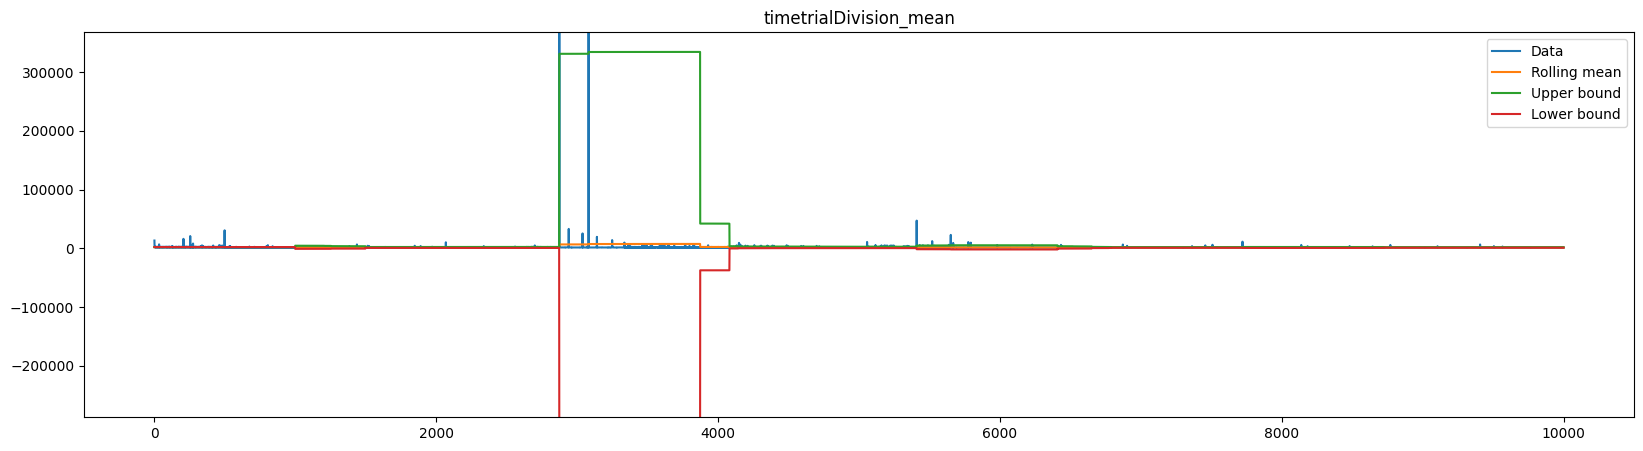

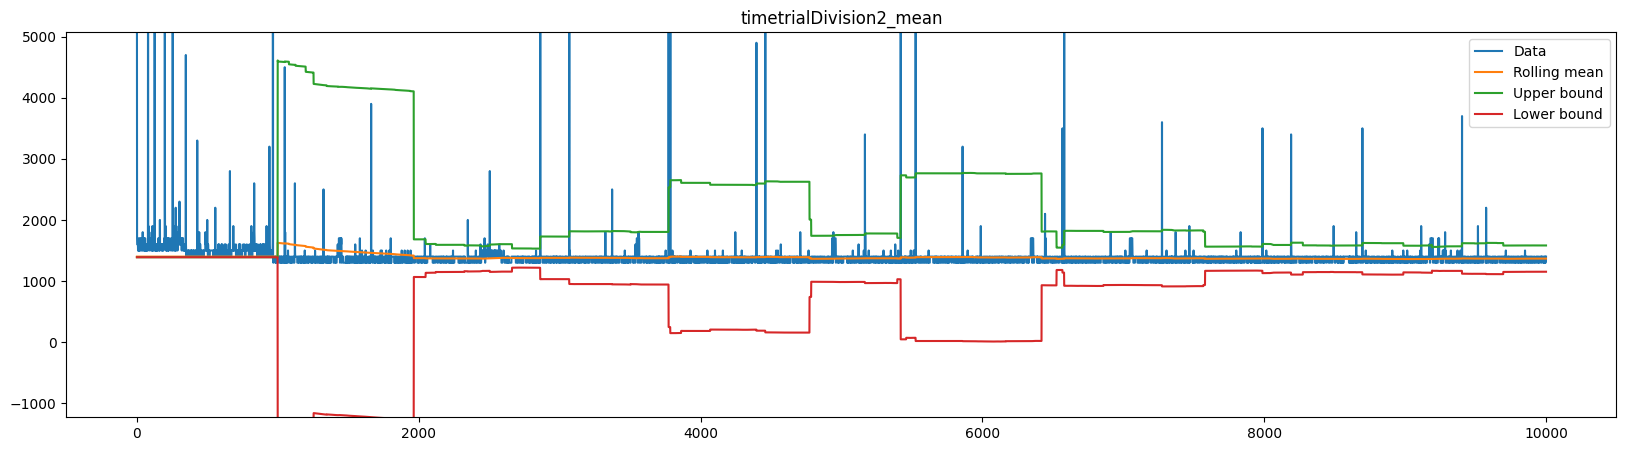

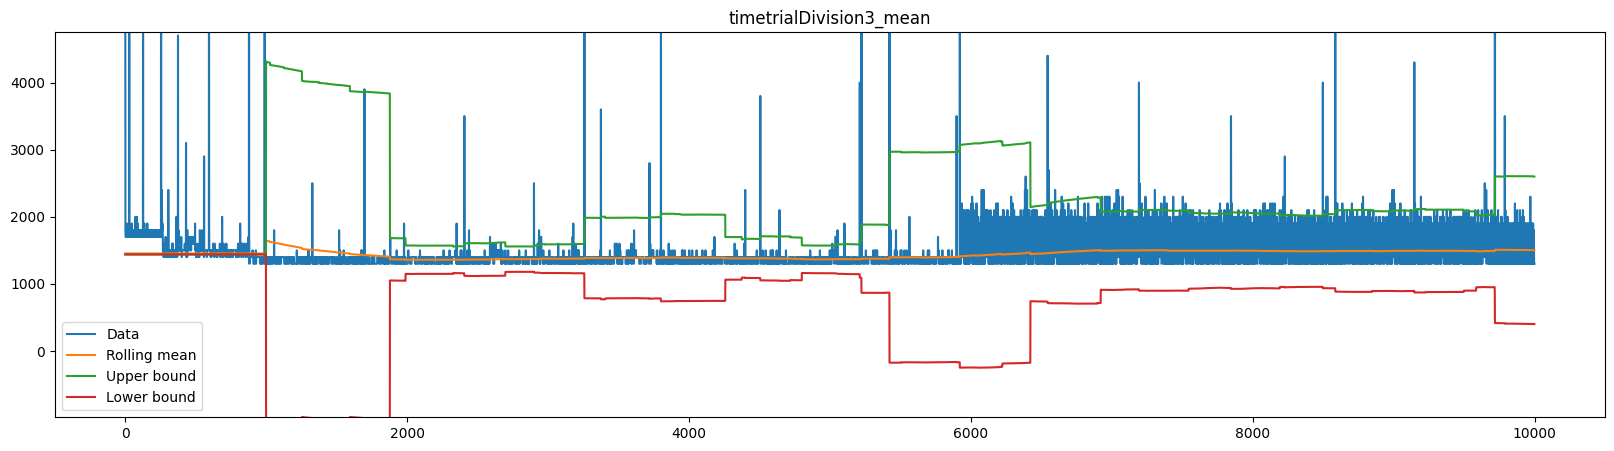

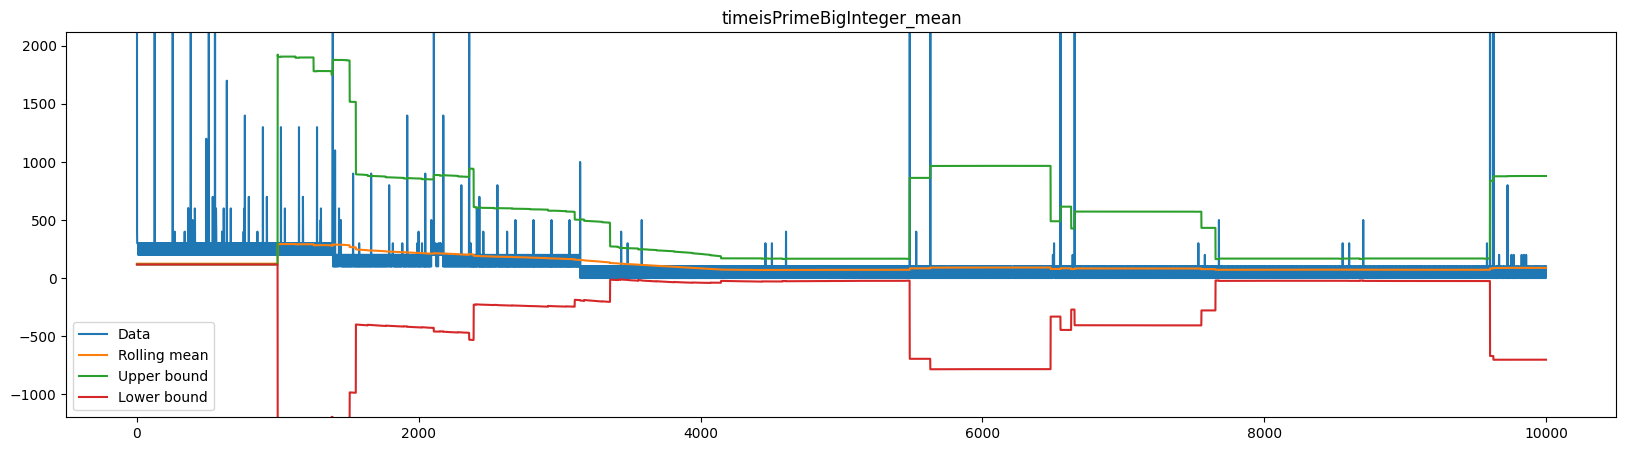

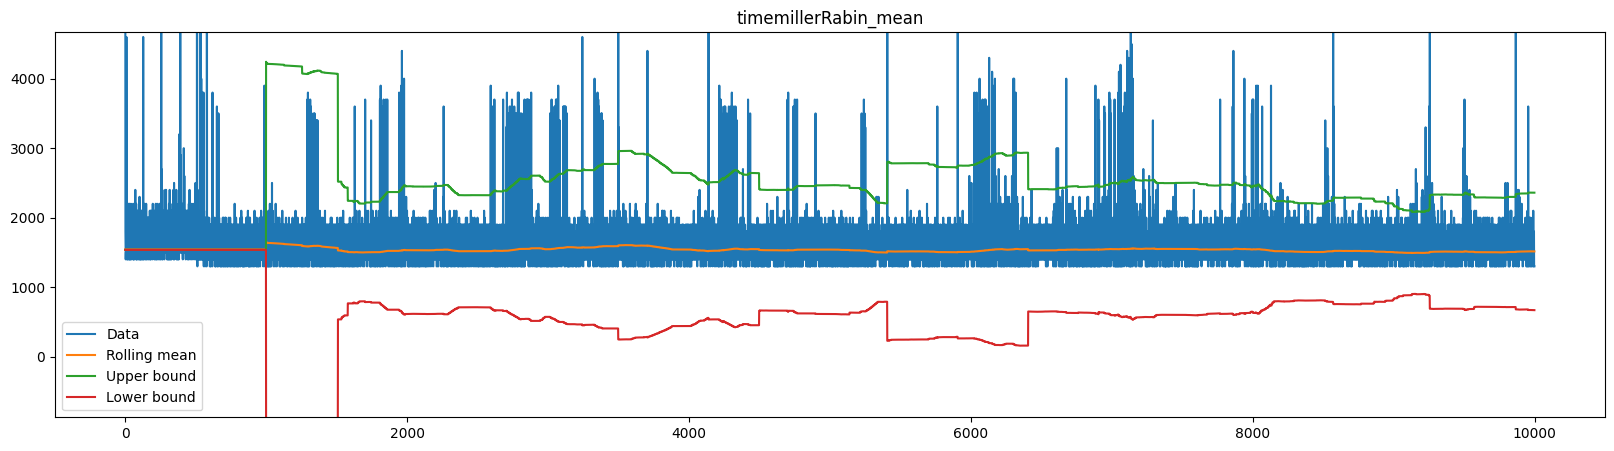

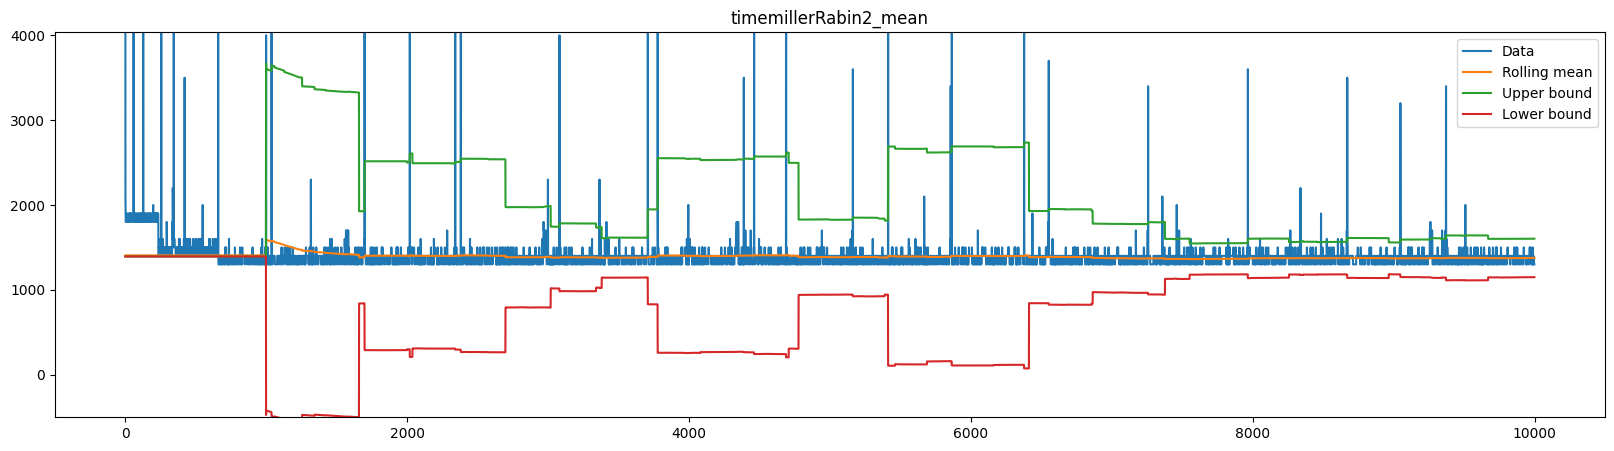

In [217]:
# Plot the rolling mean of the columns
for col in df.columns:
    if "_mean" in col and not "_upper" in col and not "_lower" in col:
        plt.figure(figsize=(20, 5))
        plt.title(col)
        # Limit the y axis to the max value of the column
        # to make the plot more readable
        plt.ylim(df[col + "_lower"].min() * 0.9, df[col + "_upper"].max() * 1.1)
        plt.plot(
            df[col.replace("_mean", "")],
        )
        plt.plot(df[col])
        plt.plot(df[col + "_upper"])
        plt.plot(df[col + "_lower"])
        plt.legend(["Data", "Rolling mean", "Upper bound", "Lower bound"])
        plt.show()

In [218]:
# Create the anomaly column
for col in df.columns:
    if "_mean" in col and not "_upper" in col and not "_lower" in col:
        df[col + "_anomaly"] = np.where(
            (df[col.replace("_mean", "")] > df[col + "_upper"])
            | (df[col.replace("_mean", "")] < df[col + "_lower"]),
            # return the anomaly value
            df[col.replace("_mean", "")],
            # return 0 if there is no anomaly
            0,
        )

df.head()

,timeisPrime,timetrialDivision,timetrialDivision2,timetrialDivision3,timeisPrimeBigInteger,timemillerRabin,timemillerRabin2,timeisPrime_mean,timetrialDivision_mean,timetrialDivision2_mean,...,timemillerRabin_mean_lower,timemillerRabin2_mean_upper,timemillerRabin2_mean_lower,timeisPrime_mean_anomaly,timetrialDivision_mean_anomaly,timetrialDivision2_mean_anomaly,timetrialDivision3_mean_anomaly,timeisPrimeBigInteger_mean_anomaly,timemillerRabin_mean_anomaly,timemillerRabin2_mean_anomaly
0,28100,13300,6000,5000,3800,6100,9400,2710.56,2177.99,1399.92,...,1536.777565,1392.690524,1392.690524,28100,13300,6000,5000,3800,6100,9400
1,16900,3000,1700,1800,400,1800,2100,2710.56,2177.99,1399.92,...,1536.777565,1392.690524,1392.690524,16900,3000,1700,1800,400,1800,2100
2,14000,1800,1600,1700,300,1500,1900,2710.56,2177.99,1399.92,...,1536.777565,1392.690524,1392.690524,14000,1800,1600,1700,300,1500,1900
3,17400,1700,1600,1700,300,1400,1800,2710.56,2177.99,1399.92,...,1536.777565,1392.690524,1392.690524,17400,1700,1600,1700,300,1400,1800
4,15900,1700,1600,1700,300,1500,1800,2710.56,2177.99,1399.92,...,1536.777565,1392.690524,1392.690524,15900,1700,1600,1700,300,1500,1800


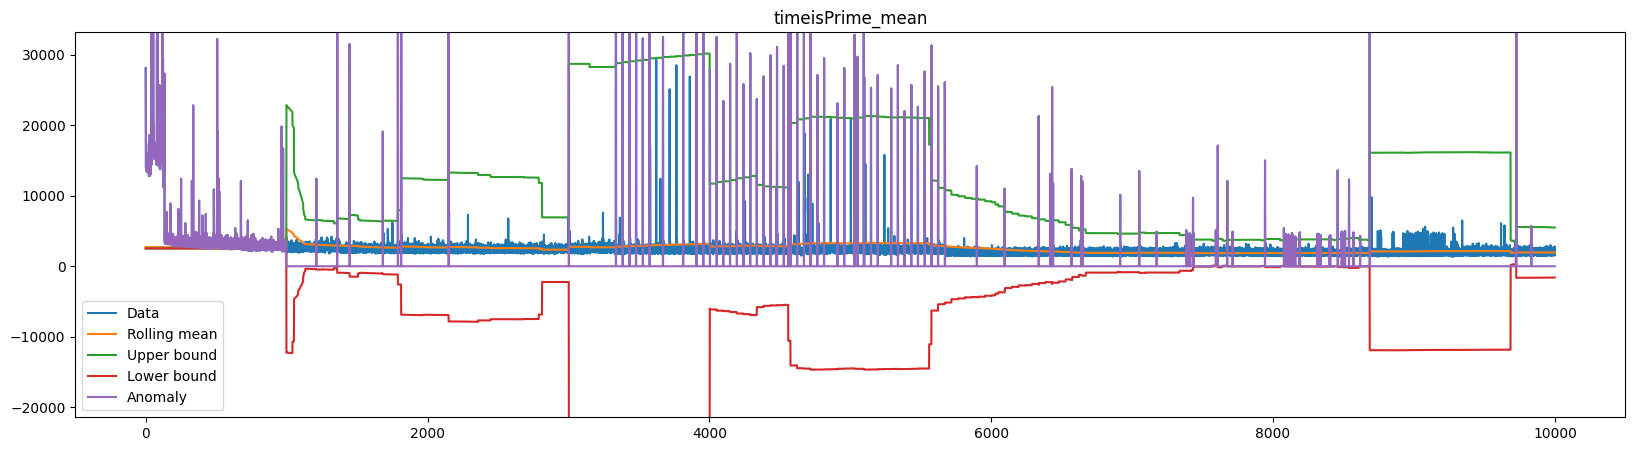

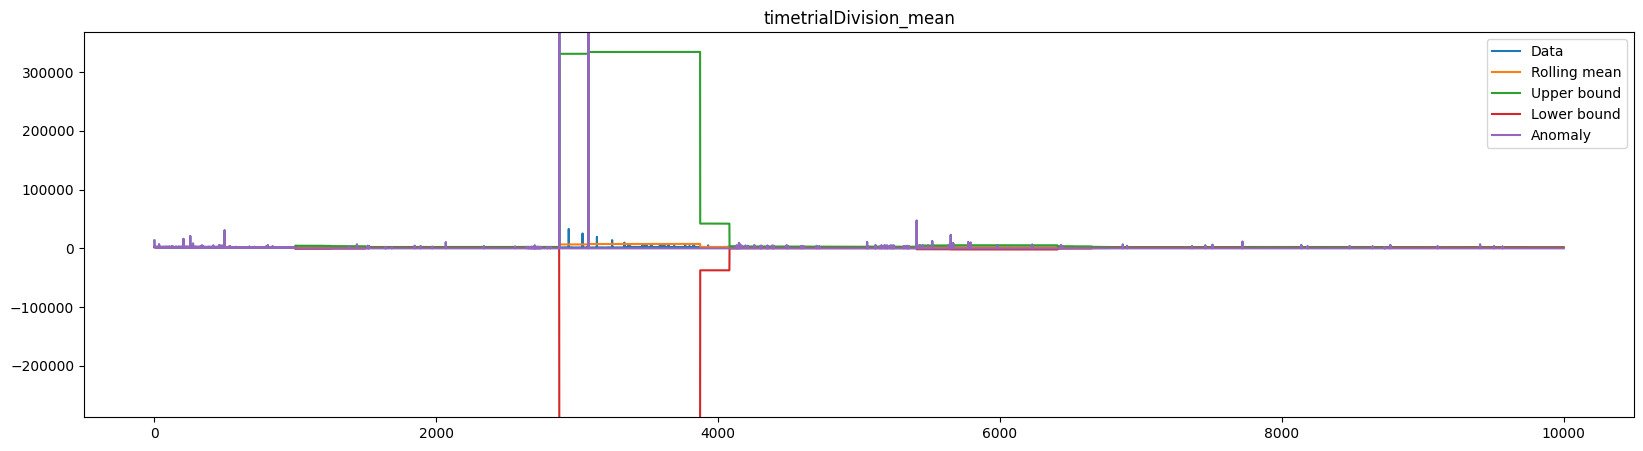

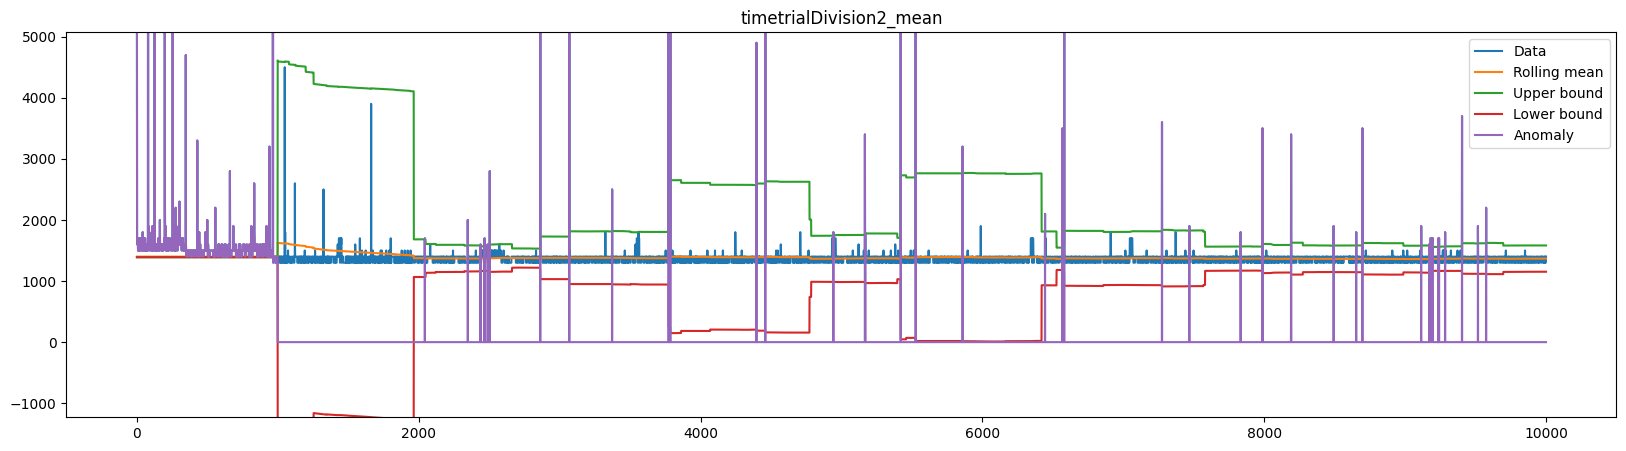

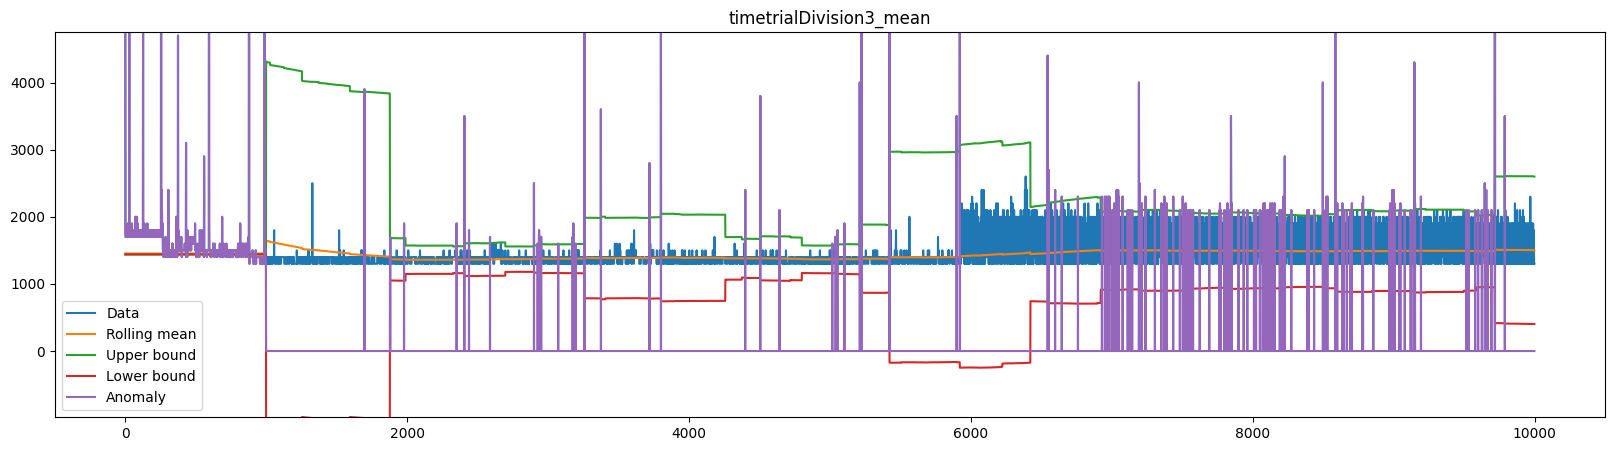

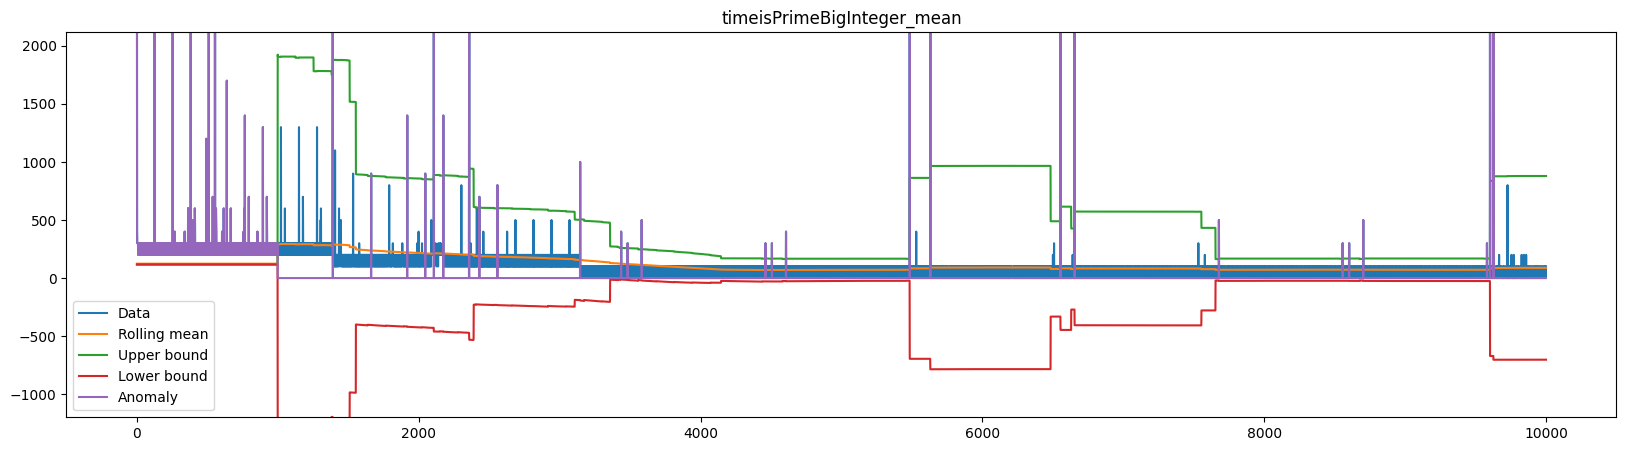

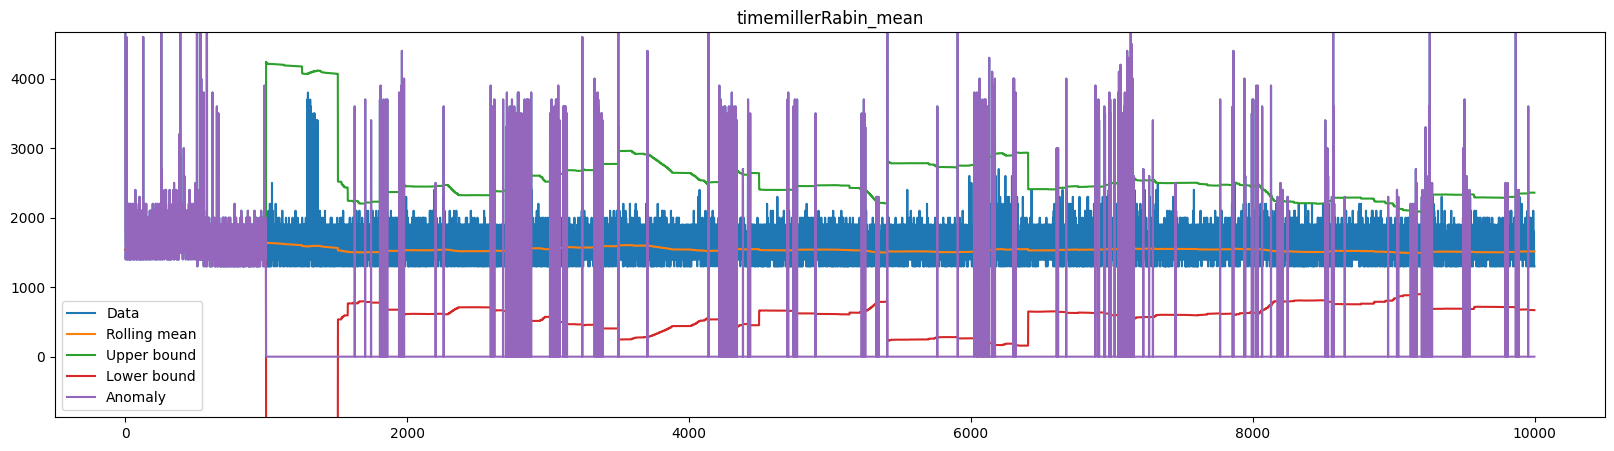

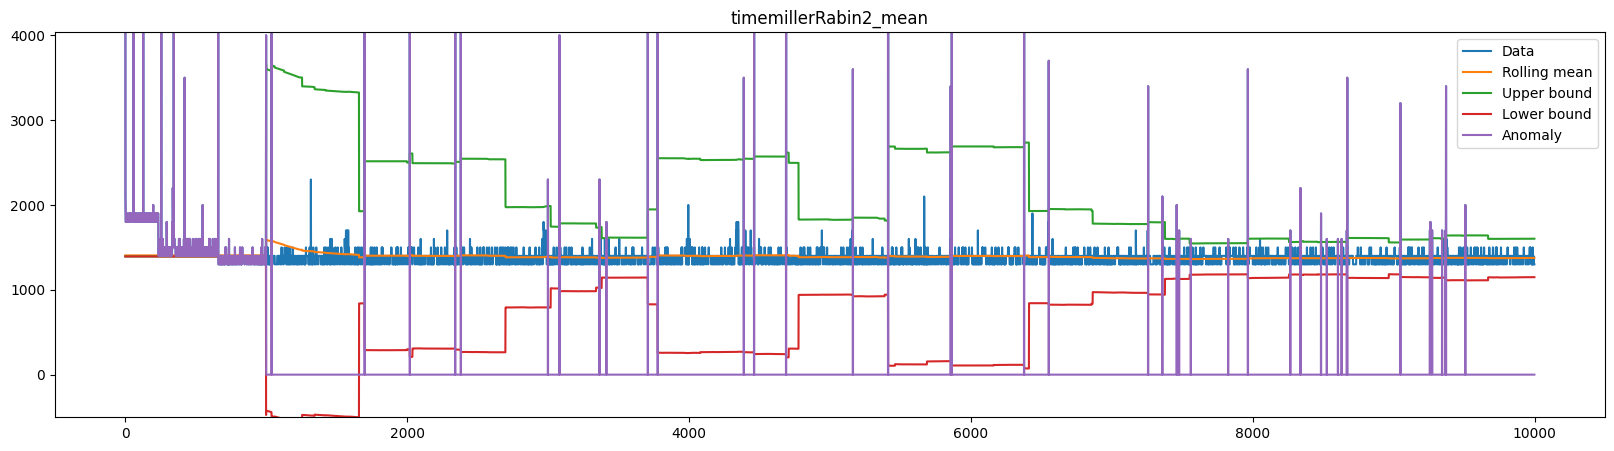

In [220]:
# Plot the data with the anomalies and the upper and lower bound
for col in df.columns:
    if (
        "_mean" in col
        and not "_upper" in col
        and not "_lower" in col
        and not "_anomaly" in col
    ):
        plt.figure(figsize=(20, 5))
        plt.title(col)
        # Limit the y axis to the max value of the column
        # to make the plot more readable
        plt.ylim(df[col + "_lower"].min() * 0.9, df[col + "_upper"].max() * 1.1)
        plt.plot(
            df[col.replace("_mean", "")],
        )
        plt.plot(df[col])
        plt.plot(df[col + "_upper"])
        plt.plot(df[col + "_lower"])
        plt.plot(df[col + "_anomaly"])
        plt.legend(["Data", "Rolling mean", "Upper bound", "Lower bound", "Anomaly"])
        plt.show()

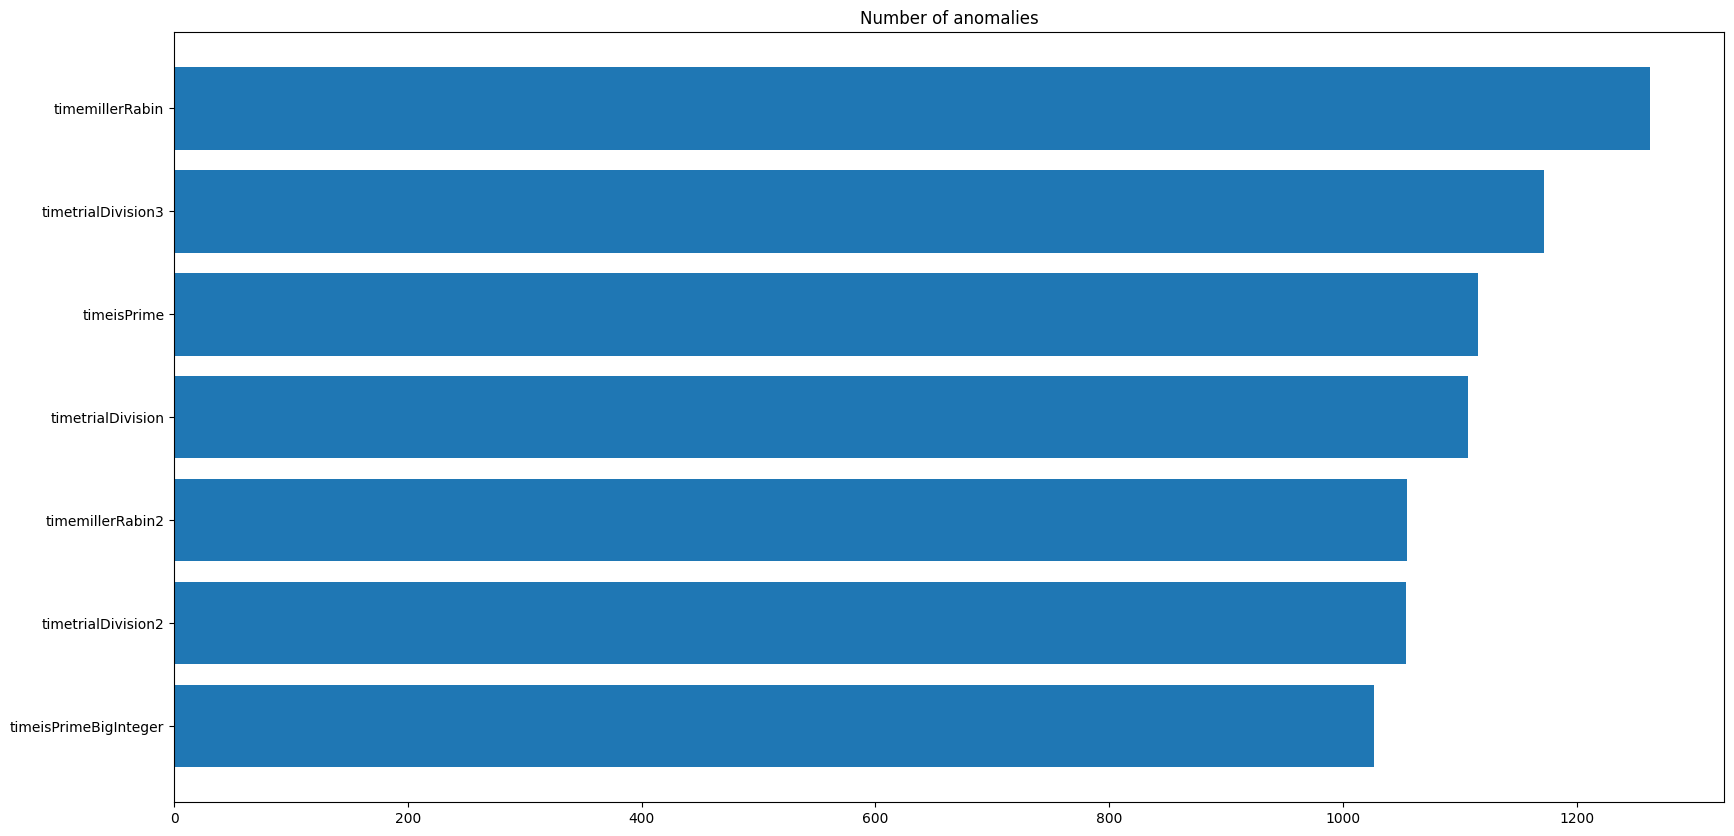

In [230]:
# Count the number of anomalies for each column
anomalies = []

for col in df.columns:
    if "_anomaly" in col:
        # Get all the values that are not 0
        anomalies.append(
            (df[col].loc[df[col] != 0].count(), col.replace("_mean_anomaly", ""))
        )

# Sort the anomalies by the number of anomalies
anomalies.sort()

# Plot the number of anomalies for each column
plt.figure(figsize=(20, 10))
plt.barh([x[1] for x in anomalies], [x[0] for x in anomalies])
plt.title("Number of anomalies")
plt.show()
# THe one that has the most anomalies is the more inestable one

## Conclusión

Se puede observar que los datos obtenidos son similares entre ellos, aun así se puede diferenciar con claridad entre ellos. Además, se puede cuanto de estables con los algoritmos, el más estable es el que tiene menos anomalías en los datos, es decir, el que tiene menos picos y valles y el menos estable viceversa.